Dynamic Systems - Part 2
---

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
from IPython import display

**Reminder from last lecture:**

An $N^{th}$ order system with an output signal $y(t)$, when subjected to a general input signal represented by the forcing signal $F(t)$ is given by:

$$
a_n \frac{d^n y}{dt^n}+a_{n-1} \frac{d^{n-1} y}{dt^{n-1}}+\cdot \cdot \cdot +a_{1} \frac{d y}{dt} + a_0 y= F(t) \\
F(t) = b_m \frac{d^m x}{dt^m}+b_{m-1} \frac{d^{m-1} x}{dt^{m-1}}+\cdot  \cdot \cdot +b_{1} \frac{d x}{dt} + b_0 x \quad m \leq n
$$

and the coefficients $a_i$ and $b_j$ are a representation of physical parameters of the measuring system 

### 2$^{nd}$ order systems

$$
a_2 \frac{d^2y(t)}{dt^2} + a_1 \frac{dy(t)}{dt} + a_0 y(t) = F(t)
$$

Normalizing the equation by $a_2$ will lead to :

$$
\frac{1}{{\color{blue}{\omega ^2}}}\frac{d^2y(t)}{dt^2} + \frac{2{\color{red}{\xi}}}{{\color{blue}{\omega}}} \frac{dy(t)}{dt} + y(t) ={\color{green}{K}} F(t)
$$

With :

$$
\frac{1}{{\color{blue}{\omega^2}}} = \frac{a_2}{a_0}  = {\color{blue}{\tau_s}}^2 \\
\frac{2{\color{red}{\xi}}}{{\color{blue}{\omega}}} = \frac{a_1}{a_0} \\
{\color{green}{K}} = \frac{1}{a_0}
$$

In the above equation the three constnat are: 

- $\color{green}{K}$ - <span style="color:green"> gain parameter (similar to the linear sensitivity from before)</span>
- $\color{red}{\xi}$ - <span style="color:red"> damping parameter</span>
- $\color{blue}{\tau_S}$ - <span style="color:blue"> characteristic time</span>

### Load cell as a $2^{nd}$ order system

Many load cells rely on the *elastic* deformation of a structure with a known compliance. By measuring the deformation (using e.g. strain gauges) and relying on the compliance the force is extracted (think of a simple spring, it's not that different as a 0 order approximation). 

```{image} LoadCell.png
:alt: Load cell
:width: 500px
:align: center
```

The applied force is being opposed by two components, a linear spring with a spring constant $\color{blue}{k}$ and a dashpot characterized by $\color{red}{C}$ 

We can model this system using the following set of equations:

$$
{\color{blue}{m}}\frac{dx_m^2}{dt^2} = -{\color{red}{C}} \frac{dx_m}{dt} -{\color{green}{k}}x_m + F
$$

From the above we easily obtain that :

$$
{\color{red}{\xi}} = \frac{{\color{red}{C}}}{2 \sqrt{{\color{green}{k}}{\color{blue}{m}}}} \\ 
{\color{blue}{\omega_0}} = \sqrt{\frac{\color{green}{k}}{\color{blue}{m}}}
$$

```{note} 
The applied force $F$ is not the same as the measured force $F_m$ due to the damping of the system. Can you estimate under what conditions $F=F_m$ ?
```




Rearranging the $2^{nd}$ order system, and adding a time delay parameter to the input function (remember the dashpot) we can write our equation as 

$$
{\color{blue}{\tau_s}}^2 \frac{d^2y}{dt^2} + 2{\color{red}{\xi}}{\color{blue}{\tau_s}}\frac{dy}{dt} + y = \color{green}{K}F(t-\theta)
$$

Which we will solve numerically using [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)


Text(0, 0.5, 'y(t)')

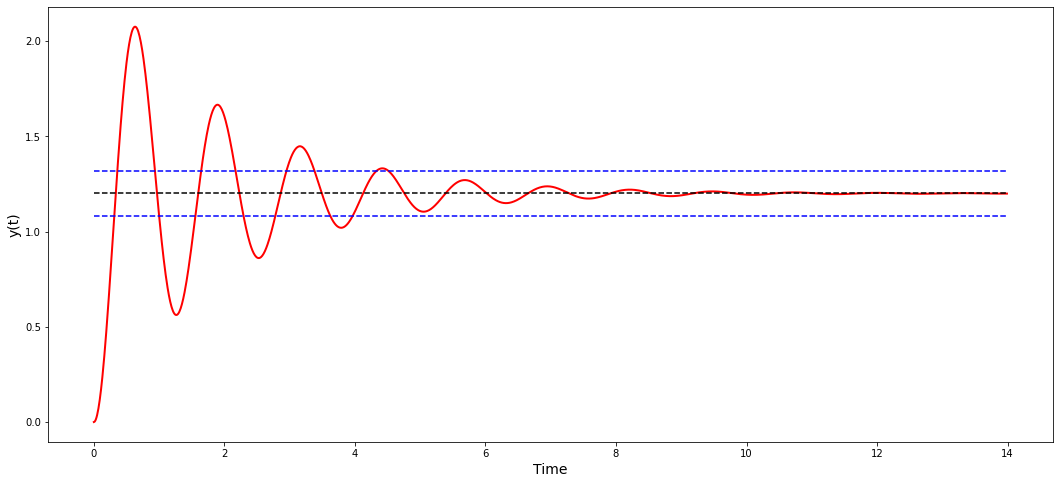

In [2]:
from scipy.integrate import odeint
K = 1.2
tau = 0.2
zeta = 0.1
theta = 0.0
du = 1.0
yInf = K*du
def SOS_ODE(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*tau*dydt - y + K*du)/tau**2
    return [dydt,dy2dt2]

t = np.arange(0,14,0.010)
x = odeint(SOS_ODE,[0,0],t)
y = x[:,0]
yInf = K*du


fig, ax = plt.subplots(figsize=(18, 8),sharex=True, sharey=True)
ax.plot(t,y,'r-',linewidth=2,label='ODE Integrator')
ax.plot([0,max(t)],[yInf,yInf],'k--')
ax.plot([0,max(t)],[1.1*yInf,1.1*yInf],'b--')
ax.plot([0,max(t)],[0.9*yInf,0.9*yInf],'b--')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('y(t)', fontsize=14)



solving for a sin() input 



In [3]:
import scipy.signal as sg
#K = 1.5
#tau = 0.8
#zeta = 0.4
theta = 0.0
#here we will use the transfer function
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
def second_order_w_sin(tau,K,xi,Omega):
    Tvec = np.arange(0.0, 20*np.pi/Omega, 0.05)
    num = [K]
    den = [np.power(tau,2),2*xi*tau,1]
    SoS = sg.TransferFunction(num,den)
    Ft = np.sin(Omega*Tvec)
    Tout, sinRes, xout = sg.lsim(SoS, Ft, Tvec)
    fig, ax = plt.subplots(1, 1, figsize=(18, 8),sharex=False, sharey=False)
    ax.plot(Tvec*Omega/(2*np.pi), sinRes,label='system response',color='blue')
    ax.plot(Tvec*Omega/(2*np.pi), Ft,label='system input',color='green')
    ax.set_xlabel('Normalized time')
    ax.set_title(r'response to s sin input $\omega \tau$ = %f'%(Omega*tau), fontsize=14)
    ax.legend()


# Simulate tau * dy/dt = -y + F(omega)

interact(second_order_w_sin, tau = (0.1,5,0.1), K= (0.0,2,0.1), xi= (0.0,1,0.05), Omega = (0.1,5,0.1))

interactive(children=(FloatSlider(value=2.5000000000000004, description='tau', max=5.0, min=0.1), FloatSlider(…

<function __main__.second_order_w_sin(tau, K, xi, Omega)>

**So....**

What will happen if we have a mass with negligible accelaration but finite velocity?

we can write the dynamic error as 

$$
e = F_m - F = kx_m -F \approx -C\dot{x}_m
$$

a rising force, will lead to a positive $\dot{x}_m$ resulting in a negative $e$ and vice versa. 

In other words, the damping is behind the measured hysteresis

Let's try to sum it up :

| Sensor's property  |  System behavior|
|:--|---|
|$\big\Downarrow$ $k$|High sensitivity|
| $\big\Downarrow$ $\xi$,$\to$ $\big\Downarrow$ $C$|Low hysteresis|
|$\big\Downarrow$ m, $\big\Downarrow$ $\xi$, $\big\Uparrow$ $\omega_0$, $\big\Downarrow$ $k$ | Minimize the phase shift over a large frequency range|
|$\big\Downarrow$ m, $\big\Downarrow$ $\xi$, $\big\Uparrow$ $\omega_0$, $\big\Downarrow$ $k$ | Amplitude ratio approaching 1 over a large frequency range |
|$\xi$ sufficiently large (or not too small) |Decrease "ringing" due to step input|


